# TME6: Approches interprétables "par design"

- LE LORIER Yann
- NGUYEN Hoang-Son

## Exercice 1: Mesures de discrimination

### Question 1

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [2]:
def Shannon(p):
    # P correspond à une distribution de probabilité
    if p == 0 or p == 1:
        return float(0)
    return -p*math.log(p, 2) - (1-p)*math.log(1-p, 2)

def Gini(p):
    if p == 0:
        return float(0)
    return 1 - p**2 - (1-p)**2

def Ambiguite(p):
    if p == 0 or p == 1:
        return float(0)
    if p > 1-p:
        return ((1-p)/p)*math.log(2, 2)
    return (p/(1-p))*math.log(2, 2)


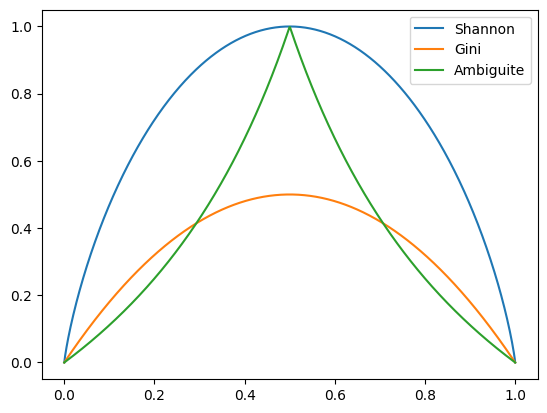

In [3]:
x=np.linspace(0,1,1000)
y=np.asarray([Shannon(i) for i in x])
plt.plot(x, y, label='Shannon')
y=np.asarray([Gini(i) for i in x])
plt.plot(x, y, label='Gini')
y=np.asarray([Ambiguite(i) for i in x])
plt.plot(x, y, label='Ambiguite')
plt.legend()
plt.show()

### Question 2

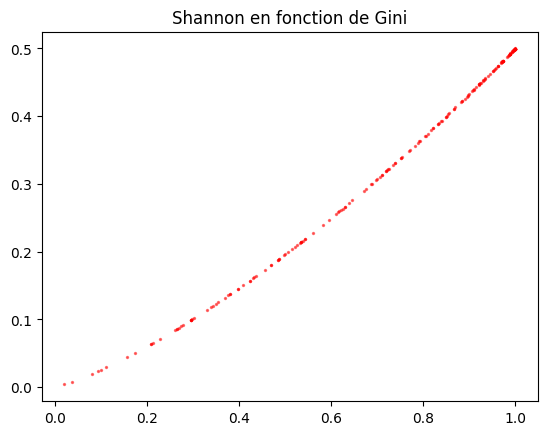

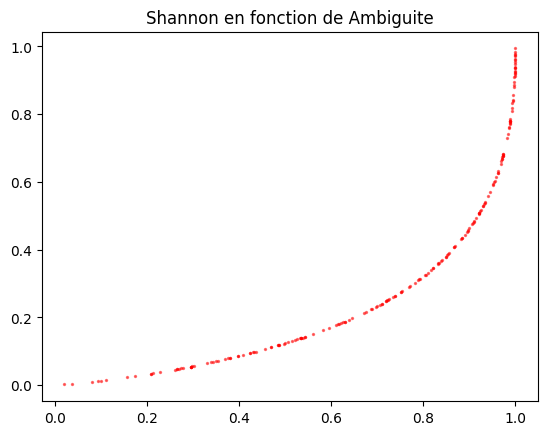

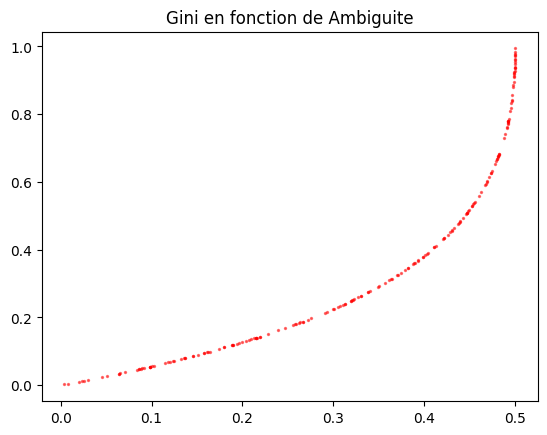

In [4]:
sample = np.random.choice(x, size = 200)
list_H = [Shannon, Gini, Ambiguite]
for i in range(len(list_H)-1):
    for j in range(i+1, len(list_H)):
        f_1 = list_H[i]
        f_2 = list_H[j]
        H1 = []
        H2 = []
        for p in sample:
            H1.append(f_1(p))
            H2.append(f_2(p))
        plt.scatter(H1, H2, s=2, c='red', alpha=0.5)
        plt.title(f"{f_1.__name__} en fonction de {f_2.__name__}")
        plt.show()

### Question 3 - Commentaires sur les mesures

En fonction des mesures prises en considération, nous pouvons observer, dans le cas de la classification binaire, que les points suivent une courbe que peut être assimilée à une courbe quadratique ou bien une courbe linéaire. Si la courbe est strictement croissante, nous pouvons conclure que si nous prenons deux mesures $H_1$ et $H_2$, et une probabilité $p_1$ et $p_2$, nous avons:

$$
\text{Si } H_1(p_1) > H_1(p_2) \Rightarrow H_2(p_1) > H_2(p_2)
$$

Ceci veut dire que l'ordre des attributs est conservé et que nous pouvons donc utiliser n'importe quelle mesure, puisqu'on connaît la relation entre $H_1$ et $H_2$

## Exercice 2

### Question 1

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.datasets import load_digits
base_digits = load_digits()
print("Descriptions de la base digits:\n", base_digits.data)

Descriptions de la base digits:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(base_digits.data, base_digits.target, test_size=0.2)

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
mon_arbre = DecisionTreeClassifier(criterion="entropy")
mon_arbre.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
mon_arbre.score(X_test, y_test)

0.8833333333333333

### Question 2

In [10]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

In [11]:
elections_df = pd.read_csv('data/elections.csv')
elections_df.columns

Index(['Adresse', 'Majeur?', 'Nationalite', 'Label'], dtype='object')

Encodage One-Hot avec `pandas.get_dummies`

In [12]:
elections_df_oh = pd.get_dummies(elections_df, columns=['Adresse', 'Majeur?', 'Nationalite'], drop_first=True)
elections_df_oh.head()

,Label,Adresse_Paris,Adresse_Strasbourg,Majeur?_oui,Nationalite_Italien,Nationalite_Suisse
0,1,1,0,1,0,0
1,-1,1,0,0,0,0
2,1,0,0,1,1,0
3,-1,1,0,1,0,1
4,-1,0,1,0,1,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(elections_df_oh.drop('Label', axis=1), elections_df_oh['Label'], test_size=0.2)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.score(X_test, y_test)

1.0

### Question 3 et 4 - Construction d'un arbre

Construction d'un arbre avec ID3

Nous pouvons réaliser la construction de l'arbre avec un dataset d'entraînement. On attend alors un `pd.dataframe`.

In [15]:
df = pd.read_csv('data/weather.csv')

In [16]:
df

,Outlook,Temperature,Humidity,WindSpeed,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [17]:
import ipdb

In [18]:
df.columns[0]

'Outlook'

On sépare le dataset en X et Y (labels):

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Play', axis=1), df['Play'], test_size=0.2)

In [20]:
X_train['Temperature']

6     Cool
10    Mild
3     Mild
1      Hot
8     Cool
4     Cool
7     Mild
9     Mild
11    Mild
2      Hot
0      Hot
Name: Temperature, dtype: object

In [21]:
y_train

6     Yes
10    Yes
3     Yes
1      No
8     Yes
4     Yes
7      No
9     Yes
11    Yes
2     Yes
0      No
Name: Play, dtype: object

In [22]:
def count_pos_neg(data_x, data_y, pos_label, attribute, value):
    count_pos = 0
    count_neg = 0
    for index, row in (data_x[data_x[attribute] == value]).iterrows():
        if data_y[index] == pos_label:
            count_pos += 1
        else:
            count_neg += 1
    return count_pos, count_neg

In [23]:
count_pos_neg(X_train, y_train, 'Yes', 'Temperature', 'Cool')

(3, 0)

In [24]:
dict_value_counts = df['Outlook'].value_counts(sort=False)
for value, count in dict_value_counts.items():
    print(value)

Sunny
Overcast
Rainy


In [25]:
df[df['Play'] == 'Yes'].count().shape[0]

5

In [26]:
data = X_train[X_train['Outlook'] == 'Rainy'] 
y_train.loc[data.index]

3    Yes
4    Yes
9    Yes
Name: Play, dtype: object

In [49]:
class Node:
    def __init__(self, att_name):
        self.att_name = att_name
        self.children = {}
        self.parent = None
        self.cl = None
        
    def set_connection(self, action, node):
        self.children[action] = node
        
    def one_step(self, action):
        return self.children[action]

##### ============ ######


class MonArbre:
    def __init__(self):
        self.root = None #class Node
        self.tot_ent = None

    def set_total_entropy(self, total_entropy):
        self.tot_ent = total_entropy

    def count_pos_neg(self, data_x, data_y, pos_label, attribute, value):
        count_pos = 0
        count_neg = 0
        for index, row in (data_x[data_x[attribute] == value]).iterrows():
            if data_y[index] == pos_label:
                count_pos += 1
            else:
                count_neg += 1
        return count_pos, count_neg

    def entropy(self, data_x, data_y, pos_label, attribute, value):
        pos, neg = self.count_pos_neg(data_x, data_y, pos_label, attribute, value)
        s_len = len(data_x.index)
        term1 = (pos/s_len) * np.log2(pos/s_len) if pos != 0 else 0
        term2 = (neg/s_len) * np.log2(neg/s_len) if neg != 0 else 0
        return - (term1 + term2)
            

    def gain(self, data_x, data_y, pos_label=None, attributes=None):
        assert attributes is not None, 'Attributes should not be None!'
        assert pos_label is not None, 'The positive label is not defined.'
        #sum of the values in specific attribute (Cool, hot, mild, etc.)
        gains = []
        for attribute in attributes:
            values, counts = np.unique(data_x[attribute], return_counts=True)
            sum_ = 0
            for value in values:
                value_length = len(data_x[data_x[attribute] == value])
                sum_ += (value_length/len(data_y)) * self.entropy(data_x, data_y, pos_label, attribute, value)
            gains.append(sum_)

        max_info_ind = np.argmax(gains)
        return attributes[max_info_ind]

    def total_entropy(self, data_y):
        values, counts = np.unique(data_y, return_counts=True)
        probs = counts/len(data_y)
        att_ent = -np.sum(probs * np.log2(probs))
        return att_ent

    def generate_children(self, node, data_x, data_y):
        dict_value_count =  data_x[node.att_name].value_counts(sort=False)
        subtree = {}
        class_data = data_y.unique()
        for v, c in dict_value_count.items():
            data = data_x[data_x[node.att_name] == v] 
            assigned_flag = False
            for cl in class_data:
                #get the data_y according to the data rows
                data_Y = (data_y.loc[data.index] == cl)
                count = len(data_Y)
                if count == c: 
                    subtree[v] = cl
                    for loc, row in (data_x[data_x[node.att_name] != v]).iterrows():
                        data_y.drop(loc)
                    data_x = data_x[data_x[node.att_name] != v]
                    assigned_flag = True
            if not assigned_flag: 
                subtree[v] = "unassigned"
        return subtree, data_x, data_y
        
        
    def fit(self, data_x, data_y, pos_label, node=None):
        """
        data_x: pd.dataframe
        data_y: labels
        """
        self.set_total_entropy(self.total_entropy(data_y))
        
        ipdb.set_trace()
        while len(data_x) != 0:
            max_info_feature = self.gain(data_x, data_y, pos_label, data_x.columns)
            this_node = Node(max_info_feature)
            #self.root = {}#Node(max_info_feature)

            if node is not None:
                node.set_connection(max_info_feature, this_node)
            else:
                self.root = this_node

            subtree, data_x, data_y = self.generate_children(this_node, data_x, data_y)
            #add subtree to the node children

            for node, branch in list(subtree.items()):
                if branch == "unassigned":
                    new_data_x = data_x[data_x[max_info_feature] == node]
                    new_data_y = data_y[data_x[max_info_feature] == node]
                    self.fit(new_data_x, new_data_y, pos_label, node=this_node)
            
        
    def predict(self, data) -> str:
        """
        predicts one data point i.e. runs through the tree
        """
        curr_node = self.root
        # Continue iterating until we find a leaf node
        while curr_node.cl is None:
            # Use one_step method to traverse the tree
            curr_node = curr_node.one_step(data[curr_node.att_name])
        return curr_node.cl
        
    def predict_xai(self, data) -> str:
        curr_node = self.root
        # Continue iterating until we find a leaf node
        path = f'[{curr_node.att_name}]'
        ipdb.set_trace()
        while curr_node.cl is None:
            # Use one_step method to traverse the tree
            path += '--'
            curr_node = curr_node.one_step(data[curr_node.att_name])
            path += f'[{curr_node.att_name}] -->'
        return curr_node.cl

In [50]:
tree_xai = MonArbre()
tree_xai.fit(X_train, y_train, 'Yes')
predict = X_train.loc[2]

> /var/folders/x0/tqjt41r52bd_0pkfnp1g_jcc0000gp/T/ipykernel_7986/3371733599.py(95)fit()
     94         ipdb.set_trace()
---> 95         while len(data_x) != 0:
     96             max_info_feature = self.gain(data_x, data_y, pos_label, data_x.columns)



ipdb>  c


### Question 5 - Dataset Mushrooms

In [47]:
df_mushrooms = pd.read_csv('data/mushrooms-1124.csv')
ipdb.set_trace()
X_train, X_test, y_train, y_test = train_test_split(df_mushrooms.drop('class', axis=1), df_mushrooms['class'], test_size=0.2)
tree_mushrooms = MonArbre()
tree_mushrooms.fit(X_train, y_train, 'e')
predict = X_train.loc[0]

--Return--
None
> /var/folders/x0/tqjt41r52bd_0pkfnp1g_jcc0000gp/T/ipykernel_7986/1596442190.py(2)<module>()
      1 df_mushrooms = pd.read_csv('data/mushrooms-1124.csv')
----> 2 ipdb.set_trace()
      3 X_train, X_test, y_train, y_test = train_test_split(df_mushrooms.drop('class', axis=1), df_mushrooms['class'], test_size=0.2)



ipdb>  c


> /var/folders/x0/tqjt41r52bd_0pkfnp1g_jcc0000gp/T/ipykernel_7986/3371733599.py(95)fit()
     94         ipdb.set_trace()
---> 95         while len(data_x) != 0:
     96             max_info_feature = self.gain(data_x, data_y, pos_label, data_x.columns)



ipdb>  c


In [48]:
tree_mushrooms.predict_xai(predict)

> /var/folders/x0/tqjt41r52bd_0pkfnp1g_jcc0000gp/T/ipykernel_7986/3371733599.py(130)predict_xai()
    129         ipdb.set_trace()
--> 130         while curr_node.cl is None:
    131             # Use one_step method to traverse the tree



ipdb>  c


KeyError: 'p'